In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve,auc
import warnings
warnings.filterwarnings("ignore")
import pickle

In [23]:
X = pd.read_csv('../data/processed/X_balmix_cat_mean.csv')
y = pd.read_csv('../data/processed/y_balmix_cat_mean.csv')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10849, 15)
(2713, 15)
(10849, 1)
(2713, 1)


In [26]:
train = pd.concat([X_train, pd.DataFrame(y_train, columns=['loan_status'])], axis=1)



In [27]:
train

,term,int_rate,installment,emp_length,home_ownership,annual_inc,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,loan_status
11676,0.560763,8.90,139.72,0.520332,0.479546,44000.0,0.473215,22.94,0.500914,4318.0,58.4,0.497006,0.498455,0.483154,0.500871,1
3747,0.560763,15.31,139.27,0.506836,0.479546,15000.0,0.473215,31.20,0.500914,4328.0,92.1,0.492647,0.498455,0.483154,0.500871,0
4911,0.560763,6.62,313.18,0.513181,0.523856,111800.0,0.581884,9.30,0.500914,32387.0,40.5,0.518519,0.498455,0.542182,0.500871,1
6451,0.560763,8.90,698.58,0.528529,0.523856,100000.0,0.575362,9.42,0.500914,12781.0,63.9,0.509804,0.520723,0.541608,0.500871,1
9548,0.560763,9.76,437.31,0.520332,0.479546,36096.0,0.473215,27.26,0.500914,3174.0,43.5,0.477064,0.498455,0.483154,0.500871,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.560763,17.77,540.56,0.490360,0.523856,120000.0,0.581884,23.04,0.500914,21623.0,62.2,0.505263,0.498455,0.542182,0.500871,1
3264,0.273930,24.83,468.03,0.506836,0.523856,70000.0,0.522876,15.72,0.500914,11401.0,57.6,0.571429,0.498455,0.493500,0.500871,0
9845,0.560763,14.09,492.79,0.513181,0.479546,109000.0,0.473215,31.58,0.500914,21930.0,69.2,0.512953,0.498455,0.541608,0.500871,1
10799,0.560763,16.29,317.71,0.490360,0.523856,43000.0,0.473215,11.55,0.500914,8767.0,63.1,0.506958,0.498455,0.536383,0.500871,1


In [28]:
test = pd.concat([X_test, pd.DataFrame(y_test, columns=['loan_status'])], axis=1)

In [29]:
test

,term,int_rate,installment,emp_length,home_ownership,annual_inc,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,loan_status
1861,0.560763,8.90,79.39,0.502326,0.479546,21000.0,0.581884,26.23,0.500914,16146.0,80.3,0.485411,0.498455,0.483154,0.500871,1
11971,0.560763,15.81,315.57,0.490360,0.479546,45000.0,0.473215,10.69,0.500914,6599.0,88.0,0.470930,0.498455,0.483154,0.500871,0
10411,0.560763,15.31,633.68,0.484797,0.479546,61000.0,0.473215,17.06,0.500914,3698.0,88.0,0.492647,0.498455,0.541608,0.500871,1
3998,0.560763,22.45,783.85,0.493506,0.479546,70000.0,0.575362,21.72,0.500914,18596.0,93.9,0.501916,0.498455,0.541608,0.500871,0
2686,0.560763,12.69,161.02,0.493506,0.523856,48000.0,0.575362,4.00,0.472684,1361.0,64.8,0.484076,0.498455,0.497404,0.470255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,0.560763,10.65,309.45,0.479567,0.523856,30000.0,0.581884,19.84,0.500914,9311.0,50.9,0.479532,0.498455,0.497404,0.500871,1
2579,0.560763,21.49,830.61,0.520332,0.479546,65000.0,0.473215,13.89,0.500914,17298.0,71.5,0.477064,0.498455,0.483154,0.500871,0
882,0.560763,18.75,484.02,0.493506,0.479546,85000.0,0.581884,5.27,0.500914,6121.0,69.5,0.525234,0.498455,0.483154,0.500871,1
2576,0.560763,12.12,665.44,0.502326,0.479546,90000.0,0.473215,13.68,0.500914,16205.0,85.3,0.509890,0.498455,0.483154,0.500871,1


In [30]:
train.to_csv('../data/train/train_balmix_cat_mean.csv', index=False)
test.to_csv('../data/test/test_balmix_cat_mean.csv', index=False)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [32]:
model = DecisionTreeClassifier()

parameters = {
    "max_depth":[2,3,4,5,6],
    "min_samples_split": [3,4,6,8,10],
    "min_samples_leaf": [2,4,6],
    "criterion": ["gini", "entropy"]
}

dtc_gs = GridSearchCV(model, parameters, cv=5, scoring="roc_auc")

In [33]:
dtc_gs.fit(X_train_scal, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 4, 6, 8, 10]},
             scoring='roc_auc')

In [34]:
dtc_gs.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [35]:
dtc_gs.best_score_

0.6694939572126583

In [36]:
dtc_gs.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10)

In [37]:
final_model = dtc_gs.best_estimator_

final_model.fit(X_train_scal, y_train)

y_pred = final_model.predict(X_test_scal)

In [38]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy_score 0.6207150755621084
recall_score 0.5613519470977223
precision_score 0.6387959866220736
roc_auc_score 0.6209126599393936
f1_score 0.597575283535393
[[920 432]
 [597 764]]


In [39]:
results_1 = cross_val_score(final_model, X, y, cv=10, scoring="roc_auc")
print(results_1)
print(results_1.mean())
print(results_1.std())

[0.67903845 0.66976966 0.66491329 0.68351411 0.69324579 0.6555884
 0.66672214 0.65993378 0.66329152 0.6494766 ]
0.6685493748096839
0.01263153714753567


In [40]:
final_model.feature_importances_

array([0.44920277, 0.27994754, 0.02317281, 0.        , 0.        ,
       0.19053972, 0.030671  , 0.00556366, 0.        , 0.00405612,
       0.00441342, 0.01243296, 0.        , 0.        , 0.        ])

In [41]:
X_train.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

<Axes: >

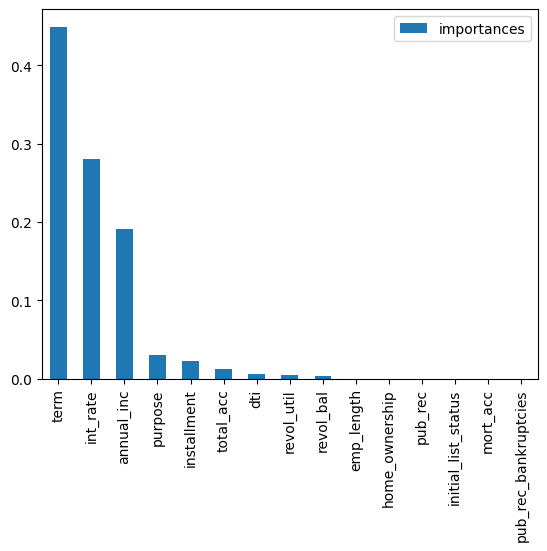

In [42]:
df_imp = pd.DataFrame({"importances":final_model.feature_importances_}, index=X_train.columns).sort_values("importances", ascending=False)
df_imp.plot(kind="bar")

In [43]:

    
# with open('dtc_roc_auc271123.pkl', "wb") as archivo_salida:
#     pickle.dump(final_model, archivo_salida)
